# Distribution function for simulating no activation

We would like to define an appropriate distribution function for sampling "no activation" values from when the function for simulating binding site distance-dependent activation scores is the following: 

In [1]:
import numpy as np

In [3]:
def activation_score(dist, peak_dist=200, score_ceiling=200, offset=0, log_scale=False):
    score = np.fmin(np.abs(peak_dist - dist), score_ceiling)
    if log_scale:
        score = np.log2(np.fmax(score, 1))
        if offset != 0:
            offset = np.log2(np.abs(offset)) * np.sign(offset)
    return score + offset

Text(0.5, 0, 'distance between binding sites')

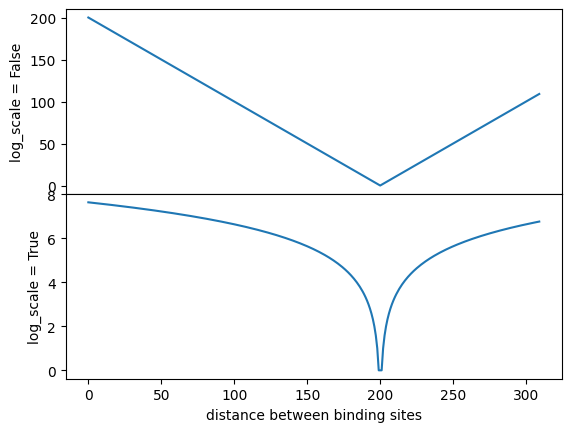

In [4]:
import matplotlib.pyplot as plt
dists = np.arange(0,310,1)
scores = activation_score(dists)
fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)
axs[0].plot(dists, scores)
axs[0].set_ylabel("log_scale = False")
axs[1].plot(dists, activation_score(dists, log_scale=True))
axs[1].set_ylabel("log_scale = True")
axs[1].set_xlabel("distance between binding sites")

## Lognormal distribution function

If a normally distributed random variable X has mean $\mu_X$ and standard deviation $\sigma_X$, then $Y = e^X$ is lognormally distributed with (shape parameter) $s = \sigma_X$ and scale = $e^{\mu_X}$.

In [5]:
from scipy.stats import lognorm

In [6]:
shapes = np.linspace(0.5, 2.5, 5, endpoint=True)
scales = np.exp(np.linspace(0, 2, 5, endpoint=True))
x = np.linspace(0.1, 50, 1000, endpoint=True)

Text(0.5, 0, 'score value')

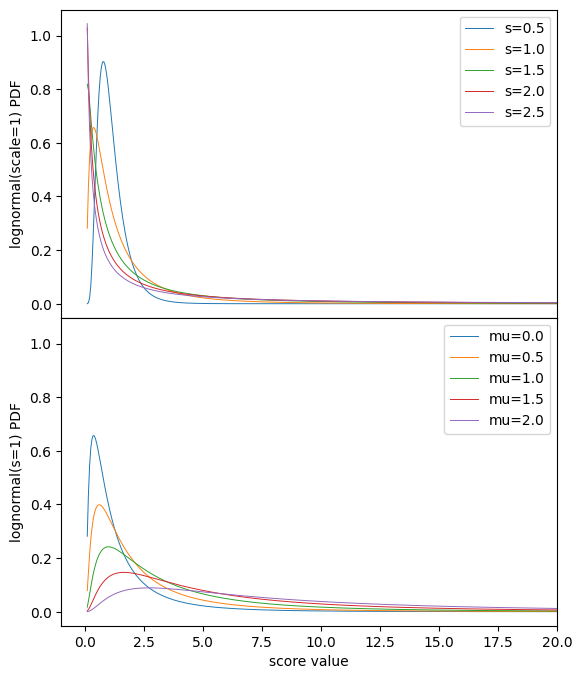

In [8]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.set_figheight(8)
for s in shapes:
    axs[0].plot(x, lognorm.pdf(x, s), label=f"s={s}", linewidth=0.7)
for scale in scales:
    axs[1].plot(x, lognorm.pdf(x, s=1, scale=scale), label=f"mu={np.log(scale):.1f}", linewidth=0.7)
axs[0].set_ylabel("lognormal(scale=1) PDF")
axs[1].set_ylabel("lognormal(s=1) PDF")
for ax in axs:
    ax.legend()
# ax.set_ylim(top=0.2)
axs[1].set_xlim(xmin=-1, xmax=20)
axs[1].set_xlabel("score value")